In [1]:
import pandas as pd
import numpy as np
import math
import statsmodels.formula.api as smf
from sklearn import cluster, datasets
import matplotlib.pylab as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import matplotlib.cm as cm
%matplotlib inline

## Q1. Linear Regression (15pts)
1. Run bi-variate regression 3 times and check their fitted coefficients respectively. (**9pts = 3$\times$3**)
    * $y = a_1x_1 + b_1$  
    * $y = a_2x_2 + b_2$  
    * $y = a_3x_3 + b_3$  
2. Run multivariate regression $y = a_1x_1 + a_2x_2 + a_3x_3 + b$ and check their fitted coefficients respectively. (**3pts**)  
3. Is there any $a_i$ from part 2 that changes significantly from part 1? What does it tell us? Which model captures the most information from the data, in terms of the in-sample $R^2$? (**3pts**)

### Q1. 1

In [2]:
data = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/ExtraCredit1.csv')
data.head()

,Unnamed: 0,Y,x1,x2,x3
0,0,7.940026,3.254009,6.434600,2.747851
1,1,7.985328,5.006651,5.250672,0.035844
2,2,3.611659,0.967550,0.991569,1.300417
3,3,2.616600,1.658464,4.491746,0.296129
4,4,16.331083,3.115099,0.303533,3.412509


In [3]:
data1 = data[['Y', 'x1']]
data2 = data[['Y', 'x2']]
data3 = data[['Y', 'x3']]

In [4]:
data1.loc[:,"x_sqr"]=data1.x1*data1.x1
data1.loc[:,"xy"]=data1.x1*data1.Y
a1=(data1.xy.sum()-data1.Y.sum()*data1.x1.sum()/len(data1))/(data1.x_sqr.sum()-data1.x1.sum()*data1.x1.sum()/len(data1))
print("a1 is : {}".format(a1))
b1=(data1.Y-data1.x1*a1).mean()
print("b1 is : {}".format(b1))

a1 is : 2.60318917004
b1 is : 2.46114746117


/Users/YueCai/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/YueCai/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:560: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [5]:
lm = smf.ols(formula='Y ~ x1', data = data1).fit()
print lm.params
print lm.rsquared

Intercept    2.461147
x1           2.603189
dtype: float64
0.52012536871


In [6]:
data2.loc[:,"x_sqr"]=data2.x2*data2.x2
data2.loc[:,"xy"]=data2.x2*data2.Y
a2=(data2.xy.sum()-data2.Y.sum()*data2.x2.sum()/len(data2))/(data2.x_sqr.sum()-data2.x2.sum()*data2.x2.sum()/len(data2))
print("a2 is : {}".format(a2))
b2=(data2.Y-data2.x2*a2).mean()
print("b2 is : {}".format(b2))

a2 is : -1.19561944956
b2 is : 14.2153202717


In [7]:
lm = smf.ols(formula='Y ~ x2', data = data2).fit()
print lm.params
print lm.rsquared

Intercept    14.215320
x2           -1.195619
dtype: float64
0.175027307038


In [8]:
data3.loc[:,"x_sqr"]=data3.x3*data3.x3
data3.loc[:,"xy"]=data3.x3*data3.Y
a3=(data3.xy.sum()-data3.Y.sum()*data3.x3.sum()/len(data3))/(data3.x_sqr.sum()-data3.x3.sum()*data3.x3.sum()/len(data3))
print("a3 is : {}".format(a3))
b3=(data3.Y-data3.x3*a3).mean()
print("b3 is : {}".format(b3))

a3 is : 2.02153167555
b3 is : 6.50815346661


In [9]:
lm = smf.ols(formula='Y ~ x3', data = data3).fit()
print lm.params
print lm.rsquared

Intercept    6.508153
x3           2.021532
dtype: float64
0.236392677552


### Q1. 2

In [10]:
data4 = data.copy()
data4['x0'] = 1
X = np.matrix(data4.iloc[:,2:])
Y = np.matrix(data.Y).T
w = (X.T * X).I * X.T * Y
print(w)

[[ 2.9000093 ]
 [-1.12522397]
 [ 1.92958708]
 [ 0.71864295]]


In [11]:
coef  = smf.ols(formula = 'Y ~ x1 + x2 + x3', data = data).fit()
print(coef.params)

Intercept    0.718643
x1           2.900009
x2          -1.125224
x3           1.929587
dtype: float64


### Q1. 3

From above we can tell a1 is changed notably, which means the a1 might not be a significant feature in this case. 

## Q2. Logistic Regression (35pts)
1. Load the car data, then only keep the cars with following brands: 'Cadillac', 'Chevrolet', 'SAAB'. (**3pts**)
2. Treat the 'Make' as our target variable, ignore 'Mileage', then run logistic regression over the remaining features (Note: No need to split the dataset into training ans test, just use it as a whole. Moreover, you can make the regularization ineffective by setting C equal to a huge number (say, for example, 1 million)) (**7pts**)
3. Evaluate your prediction model by doing the following:
    * first use your fitted model to predict the brand and save it as **labelPred** (**5pts**)
    * then slice the 'Make' column from your dataset as the **labelActual** (**5pts**)
    * compute the confusion matrix, showing your model's accuracy and precision for each brand (**15pts = 3+3+3$\times$3**)

In [12]:
car = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.csv')
car.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'], dtype=object)

### Q2. 1

In [13]:
to_drop = ['Buick','Pontiac','Saturn']
car = car[~car['Make'].isin(to_drop)]
car.Make.unique()

array(['Cadillac', 'Chevrolet', 'SAAB'], dtype=object)

In [14]:
car.head()

,Price,Mileage,Make,Cylinder,Liter,Doors,Cruise,Sound,Leather
80,51154.047215,2202,Cadillac,8,5.7,4,1,1,1
81,49248.158967,6685,Cadillac,8,5.7,4,1,0,1
82,46747.673270,15343,Cadillac,8,5.7,4,1,1,1
83,44130.617055,21341,Cadillac,8,5.7,4,1,0,1
84,44084.914212,21367,Cadillac,8,5.7,4,1,1,1


### Q2. 2

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
del car['Mileage']

In [17]:
first = car['Make']
car.drop(labels=['Make'], axis=1,inplace = True)
car.insert(0, 'Make', first)
car.head()

,Make,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather
80,Cadillac,51154.047215,8,5.7,4,1,1,1
81,Cadillac,49248.158967,8,5.7,4,1,0,1
82,Cadillac,46747.673270,8,5.7,4,1,1,1
83,Cadillac,44130.617055,8,5.7,4,1,0,1
84,Cadillac,44084.914212,8,5.7,4,1,1,1


In [18]:
P = car.iloc[:,1:]
W = car.iloc[:,:1]
lr = LogisticRegression(C=1e6)
lr.fit(P,W)

/Users/YueCai/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Q2. 3

In [19]:
labelPred = lr.predict(car.iloc[:,1:])

In [20]:
labelActual = car.iloc[:,:1]
labelActual_=labelActual[labelActual.columns[0]]

Cadillac confusion matrix

In [21]:
TP = sum((labelPred=='Cadillac')&(labelActual_=='Cadillac'))
FP = sum((labelPred=='Cadillac')&(labelActual_!='Cadillac'))
FN = sum((labelPred!='Cadillac')&(labelActual_=='Cadillac'))
TN = sum((labelPred!='Cadillac')&(labelActual_!='Cadillac'))
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Accuracy = %.2f%%\nPrecision = %.2f%%'%(Acc,Prec))

Accuracy = 95.14%
Precision = 89.86%


Chevrolet confusion matrix

In [22]:
TP = sum((labelPred=='Chevrolet')&(labelActual_=='Chevrolet'))
FP = sum((labelPred=='Chevrolet')&(labelActual_!='Chevrolet'))
FN = sum((labelPred!='Chevrolet')&(labelActual_=='Chevrolet'))
TN = sum((labelPred!='Chevrolet')&(labelActual_!='Chevrolet'))
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Accuracy = %.2f%%\nPrecision = %.2f%%'%(Acc,Prec))

Accuracy = 95.53%
Precision = 95.14%


SAAB confusion matrix

In [23]:
TP = sum((labelPred=='SAAB')&(labelActual_=='SAAB'))
FP = sum((labelPred=='SAAB')&(labelActual_!='SAAB'))
FN = sum((labelPred!='SAAB')&(labelActual_=='SAAB'))
TN = sum((labelPred!='SAAB')&(labelActual_!='SAAB'))
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Accuracy = %.2f%%\nPrecision = %.2f%%'%(Acc,Prec))

Accuracy = 99.61%
Precision = 98.28%


### Q3. Clustering Review. (25 pts)

In [24]:
X,y = datasets.make_circles(n_samples=200, factor=.5, noise=.05)

#### Part one: Visulize the data set. (y is your label(color)) (5pts)

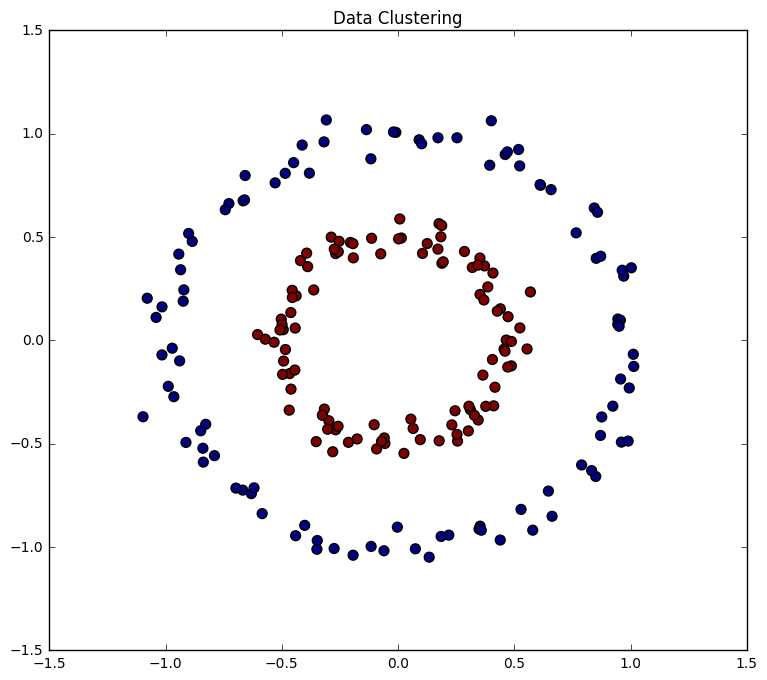

In [25]:
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, s=50)
ax.set_title("Data Clustering")

#### Part two: Use Kmeans method to divide your data X into two clusters. Plot your result(The color should be the clustering result). (5pts)

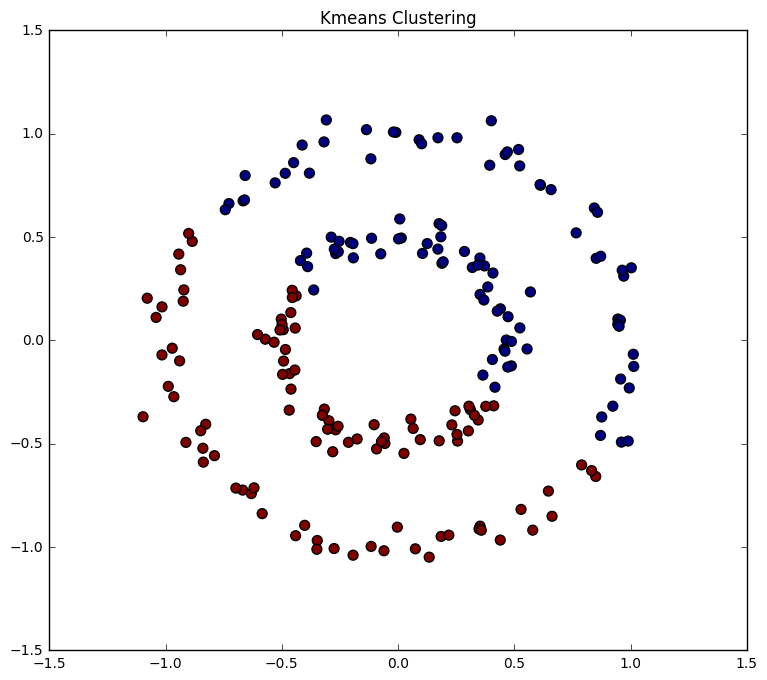

In [26]:
km=KMeans(n_clusters=2).fit(X)
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(111)
ax.scatter(X[:,0],X[:,1],c=km.labels_, s=50)
ax.set_title("Kmeans Clustering")

#### Part three: Repeat part two using Guassian Mixture Model. (5pts)

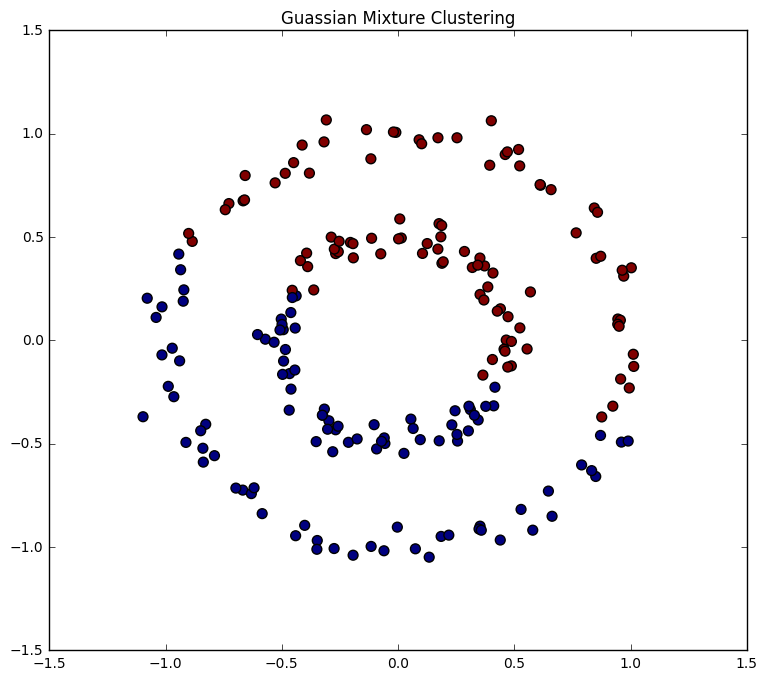

In [27]:
gm = GaussianMixture(n_components=2).fit(X)
fig = plt.figure(figsize=(9, 8))
plt.subplot(1,1,1)
plt.scatter(X[:, 0], X[:, 1], c= gm.predict(X),s=50)
plt.title("Guassian Mixture Clustering")

#### Part four: Do Guassian Mixture and Kmeans work for this data set assuming we know the real labels(y)?  Please read the website: http://scikit-learn.org/stable/modules/clustering.html#clustering and pick one clustering model from 8 options there and then, apply the new model for our data set to make sure that we could get the expected result.  (10 pts)

### NO, according to above figures, we can tell above two models do not work exactly same for the data. So I pick up a method called spectral clustering to process my data, and it matches with the original data model.

/Users/YueCai/anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


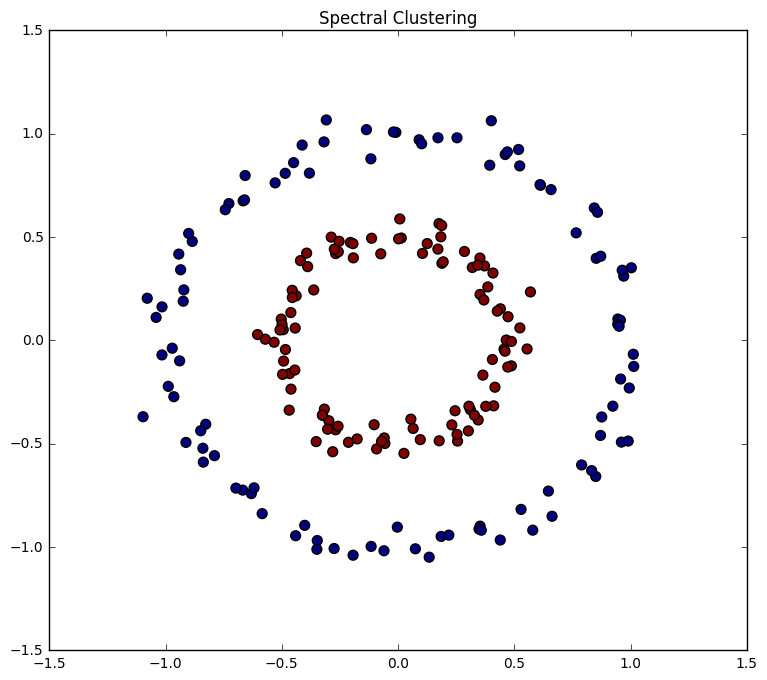

In [28]:
from sklearn.cluster import SpectralClustering
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X)
labels =spectral.fit(X).labels_
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1], c=labels, s=50)
plt.title("Spectral Clustering")

### Q4.  Use Lasso Model for feature selection. Let's use the same data set from Lecture 11, example 4. (25 pts)

(For simplifing this question, let us ignore the over fitting problem now.)


In [29]:
path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Bayesian/'
data4=pd.read_csv(path + "example4.csv", low_memory=False)
#let us generate the data set we need. 
list_311=list(data4.loc[:,"Adopt A Basket":].columns)
depend_variable=['mean_log','gross_sq_feet_log']+list_311

data4['sale_price_log']=np.log(data4['sale_price']).round(decimals=3)
data4['gross_sq_feet_log']=np.log(data4['gross_sq_feet']).round(decimals=3)
data4['mean_log']=np.log(data4['mean']).round(decimals=3)

X=data4[depend_variable]
y=data4['sale_price_log']

In [30]:
X.head(2)

,mean_log,gross_sq_feet_log,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,Beach Pool Sauna Complaint,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,11.291,7.393,0.0,0.027721,0.0,0.0,0.000770,0.000257,0.001027,0.001797,...,0.000000,0.000000,0.0,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0
1,11.917,8.253,0.0,0.010675,0.0,0.0,0.000227,0.000227,0.003861,0.000000,...,0.000227,0.000227,0.0,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0


In [31]:
y.head(2)

0    13.305
1    15.464
Name: sale_price_log, dtype: float64

#### Part 1, select the top five 311 factors which have highest correlation with the dependent variable: "sale_price_log"  (5pts)

In [32]:
Z = pd.concat([X, y], axis=1)
first = Z['sale_price_log']
Z.drop(labels=['sale_price_log'], axis=1,inplace = True)
Z.insert(0, 'sale_price_log', first)
Z.head(2)

,sale_price_log,mean_log,gross_sq_feet_log,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,13.305,11.291,7.393,0.0,0.027721,0.0,0.0,0.000770,0.000257,0.001027,...,0.000000,0.000000,0.0,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0
1,15.464,11.917,8.253,0.0,0.010675,0.0,0.0,0.000227,0.000227,0.003861,...,0.000227,0.000227,0.0,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0


In [33]:
Z.corr().head()

,sale_price_log,mean_log,gross_sq_feet_log,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
sale_price_log,1.000000,0.303444,0.543910,0.064778,0.333799,-0.107860,-0.016031,0.222568,-0.215678,0.359226,...,0.078276,0.021706,-0.267978,0.279971,0.169933,-0.115747,0.080153,-0.115332,-0.039890,0.016519
mean_log,0.303444,1.000000,0.157391,0.075033,0.205143,-0.171530,0.143286,0.260729,-0.506091,0.214504,...,0.152827,-0.040205,0.234608,0.121029,0.102712,0.203336,0.342582,0.435385,-0.575332,0.015720
gross_sq_feet_log,0.543910,0.157391,1.000000,0.048750,0.136724,0.019120,0.016094,0.144516,-0.020519,0.216787,...,0.009891,-0.031313,-0.002247,0.157051,0.096226,-0.031563,0.056114,-0.034297,-0.035324,0.062251
Adopt A Basket,0.064778,0.075033,0.048750,1.000000,0.078367,-0.027218,0.251802,0.078150,-0.061293,0.063430,...,-0.061240,0.158268,0.069792,0.052292,0.124770,0.015488,0.000841,0.016865,-0.055103,-0.004465
Air Quality,0.333799,0.205143,0.136724,0.078367,1.000000,-0.070249,-0.072189,0.128859,-0.128976,0.198331,...,0.133438,0.135612,-0.242302,0.227946,0.402781,-0.158603,-0.058383,-0.131168,-0.006245,-0.057735


In [34]:
test = Z.corr().ix[3:].sort_values(['sale_price_log'], ascending=[0])
print('The top five 311 factors are {0}'.format(list(test.index[:5])))

The top five 311 factors are ['Noise', 'Found Property', 'Sidewalk Condition', 'Broken Muni Meter', 'DOF Parking   Tax Exemption']


#### Part 2, choose the right lambda for estimating the Lasso model so that you can get exactly 20 non-zero coefficients and what are these factors selected by Lasso? (10pts)

In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 200)

In [37]:
def Regularization_fit_lambda(X_train,y_train,lambdas,p=0.4,Graph=False):
    
    RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
    model_label='Lasso'
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train,y_train)  #fit the regularization model
        if np.sum(lm.coef_ != 0) == 20:
            return i

In [38]:
lambdas = np.linspace(-15,-1,100)
lambdas=[math.exp(i) for i in lambdas]
lambda_l_optimal=Regularization_fit_lambda(X_train,y_train,lambdas,p=0.4)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

/Users/YueCai/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal lambda for Lasso=0.000360040897322


In [39]:
lasso = linear_model.Lasso(fit_intercept=True, alpha=lambda_l_optimal)
lasso.fit(X_train,y_train)
lasso.coef = lasso.coef_

In [40]:
np.count_nonzero(lasso.coef_)

20

In [41]:
X_train.columns[np.nonzero(lasso.coef_)]

Index([u'mean_log', u'gross_sq_feet_log', u'Broken Muni Meter',
       u'Damaged Tree', u'Dead Tree', u'Derelict Vehicles',
       u'Dirty Conditions', u'ELECTRIC', u'HEATING', u'Illegal Parking',
       u'Missed Collection  All Materials ', u'Noise', u'Noise   Commercial',
       u'PLUMBING_x', u'Sanitation Condition', u'Sewer',
       u'Street Light Condition', u'Taxi Complaint',
       u'Traffic Signal Condition', u'Water System'],
      dtype='object')

#### Part 3, choose the right lambda for estimating the Lasso model so that you can get exactly FIVE 311 factors and what are they? (10 pts)

In [42]:
def Regularization_fit_lambda_311(X_train,y_train,lambdas,p=0.4,Graph=False):
    
    RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
    model_label='Lasso'
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train,y_train)  #fit the regularization model
        if np.sum(lm.coef_ != 0) == 5:
            return i

In [43]:
lambdas = np.linspace(-15,-1,100)
lambdas=[math.exp(i) for i in lambdas]
lambda_l_optimal=Regularization_fit_lambda_311(X_train.iloc[:,2:],y_train,lambdas,p=0.4)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

Optimal lambda for Lasso=0.00148083151406


In [44]:
lasso_311 = linear_model.Lasso(fit_intercept=True, alpha=lambda_l_optimal)
lasso_311.fit(X_train.iloc[:,2:],y_train)
lasso_311.coef = lasso_311.coef_

In [45]:
np.count_nonzero(lasso_311.coef_)

5

In [46]:
X_train.iloc[:,2:].columns[np.nonzero(lasso_311.coef_)]

Index([u'Blocked Driveway', u'Broken Muni Meter', u'Dirty Conditions',
       u'Noise', u'Sewer'],
      dtype='object')